# 02 - Standard Kalman Filter Implementation

This notebook implements the standard Kalman filter to estimate the sparse hidden state from noisy observations. The filter assumes no prior knowledge of sparsity and uses the linear dynamic model and Gaussian assumptions.


## 1. Load Simulation Data

Import the NumPy arrays for ground truth state `x_true`, observations `y`, and measurement matrix `H`.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load simulation data
x_true = np.load("../data/x_true.npy")
y = np.load("../data/y.npy")
H = np.load("../data/H.npy")

n_timesteps, n_states = x_true.shape
n_measurements = y.shape[1]


## 2. Initialize Kalman Filter Parameters

We assume an identity transition model and Gaussian noise with predefined covariances.


In [4]:
A = np.eye(n_states)
Q = 0.01 * np.eye(n_states)
R = 0.1 * np.eye(n_measurements)
I = np.eye(n_states)

# Initial estimates
x_est = np.zeros((n_timesteps, n_states))
P = np.eye(n_states)


## 3. Apply Standard Kalman Filter

Run the recursive prediction-update steps over the entire time horizon.


In [5]:
for t in range(1, n_timesteps):
    # Predict
    x_pred = A @ x_est[t-1]
    P = A @ P @ A.T + Q

    # Update
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    x_est[t] = x_pred + K @ (y[t] - H @ x_pred)
    P = (I - K @ H) @ P


/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_19316/3969808074.py:4: RuntimeWarning: divide by zero encountered in matmul
  P = A @ P @ A.T + Q
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_19316/3969808074.py:4: RuntimeWarning: overflow encountered in matmul
  P = A @ P @ A.T + Q
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_19316/3969808074.py:4: RuntimeWarning: invalid value encountered in matmul
  P = A @ P @ A.T + Q
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_19316/3969808074.py:7: RuntimeWarning: divide by zero encountered in matmul
  S = H @ P @ H.T + R
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_19316/3969808074.py:7: RuntimeWarning: overflow encountered in matmul
  S = H @ P @ H.T + R
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_19316/3969808074.py:7: RuntimeWarning: invalid value encountered in matmul
  S = H @ P @ H.T + R
/var/folders/k0/6lmp7mrd3p93h1srd2mv_qt00000gn/T/ipykernel_19316/3969808

## 4. Save Estimated States

Save results for use in later notebooks and plotting.


In [6]:
np.save("../data/x_est_standard.npy", x_est)


## 5. Compare True and Estimated States

Visualize the estimation result for the active state components.


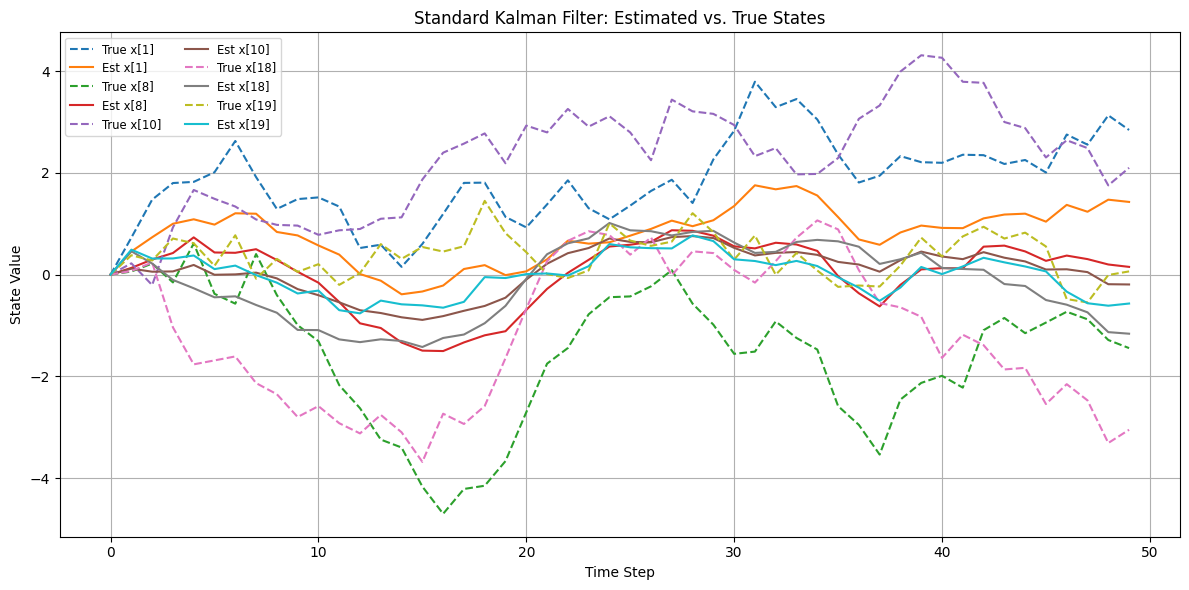

In [7]:
non_zero_indices = np.any(x_true != 0, axis=0).nonzero()[0]

plt.figure(figsize=(12, 6))
for i in non_zero_indices:
    plt.plot(x_true[:, i], label=f"True x[{i}]", linestyle="--")
    plt.plot(x_est[:, i], label=f"Est x[{i}]", linestyle="-")
plt.title("Standard Kalman Filter: Estimated vs. True States")
plt.xlabel("Time Step")
plt.ylabel("State Value")
plt.legend(ncol=2, fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.savefig("../plots/kf_est_vs_true.png")
plt.show()
